In [1]:
import numpy as np
from scipy.stats import ks_2samp
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import random
from scipy.stats import chi2

In [2]:
import os
cwd = os.getcwd()
print(cwd)

/mnt/data2/tad/Dataset/ctdd-2021-os-syslogs/Interpretability_Module


# Chi Square Test

In [3]:
def chi_square_test(observed,expected):
    chi_matrix = ((observed-expected)**2)/expected
    chi_matrix[np.isnan(chi_matrix)] = 0
    chi_matrix[np.isinf(chi_matrix)] = 0
    chi_square_matrix = (chi_matrix)
    chi_square_stat = chi_square_matrix.sum(axis=1)
    p_value= 1 - chi2.cdf(chi_square_stat.sum(),448)
    return chi_square_matrix, chi_square_stat, p_value

In [4]:
with open('Attention-Based_Weights/all_Linux_Client1_Normal_attention.npy', 'rb') as f:
    attention_client1 = np.load(f)
with open('Attention-Based_Weights/all_Linux_Client2_Normal_attention.npy', 'rb') as f:
    attention_client2 = np.load(f)
with open('Attention-Based_Weights/all_Linux_Normal_attention.npy', 'rb') as f:
    attention_fed_normal = np.load(f)
with open('Attention-Based_Weights/all_Linux_Abnormal_attention.npy', 'rb') as f:
    attention_fed_abnormal = np.load(f)
    
with open('Attention-Based_Weights/all_Backdoor-001_attention.npy', 'rb') as f:
    attention_backdoor001 = np.load(f)
with open('Attention-Based_Weights/all_Backdoor-002_attention.npy', 'rb') as f:
    attention_backdoor002 = np.load(f)
with open('Attention-Based_Weights/all_Backdoor-003_attention.npy', 'rb') as f:
    attention_backdoor003 = np.load(f)
with open('Attention-Based_Weights/all_DDoS-001_attention.npy', 'rb') as f:
    attention_ddos001 = np.load(f)
with open('Attention-Based_Weights/all_Ech0raix-t1486_attention.npy', 'rb') as f:
    attention_ech0raix = np.load(f)
with open('Attention-Based_Weights/all_GonnaCry_attention.npy', 'rb') as f:
    attention_gonnacry = np.load(f)
with open('Attention-Based_Weights/all_Malaria_attention.npy', 'rb') as f:
    attention_malaria = np.load(f)
with open('Attention-Based_Weights/all_Nemox-t1027_attention.npy', 'rb') as f:
    attention_nemox = np.load(f)
with open('Attention-Based_Weights/all_Nf3ct0r-t1027_attention.npy', 'rb') as f:
    attention_nf3ctor = np.load(f)
with open('Attention-Based_Weights/all_NTP-DDoS-Amplification_attention.npy', 'rb') as f:
    attention_ntpddos = np.load(f)
with open('Attention-Based_Weights/all_Spyware-001_attention.npy', 'rb') as f:
    attention_spyware001 = np.load(f)
with open('Attention-Based_Weights/all_SYN-Flood_attention.npy', 'rb') as f:
    attention_synflood = np.load(f)
with open('Attention-Based_Weights/all_Utrojan-t1036_attention.npy', 'rb') as f:
    attention_utrojan = np.load(f)
with open('Attention-Based_Weights/all_Virus-001_attention.npy', 'rb') as f:
    attention_virus001 = np.load(f)
with open('Attention-Based_Weights/all_Virus-002_attention.npy', 'rb') as f:
    attention_virus002 = np.load(f)
with open('Attention-Based_Weights/all_Virus-003_attention.npy', 'rb') as f:
    attention_virus003 = np.load(f)

In [5]:
# Client 1 vs Client 2 Test
chi_square_c1_c2_matrix, chi_square_c1_c2_stat, chi_square_c1_c2_pvalue = chi_square_test(attention_client1,attention_client2)
print("Client 1 vs Client 2")
print(chi_square_c1_c2_stat.sum())
print(chi_square_c1_c2_pvalue)

chi_square_c1_fn_matrix, chi_square_c1_fn_stat, chi_square_c1_fn_pvalue = chi_square_test(attention_client1,attention_fed_normal)
print("\nClient 1 vs Federated Normal")
print(chi_square_c1_fn_stat.sum())
print(chi_square_c1_fn_pvalue)

chi_square_c2_fn_matrix, chi_square_c2_fn_stat, chi_square_c2_fn_pvalue = chi_square_test(attention_client2,attention_fed_normal)
print("\nClient 2 vs Federated Normal")
print(chi_square_c2_fn_stat.sum())
print(chi_square_c2_fn_pvalue)

chi_square_fab_fn_matrix, chi_square_fab_fn_stat, chi_square_fab_fn_pvalue = chi_square_test(attention_fed_abnormal,attention_fed_normal)
print("\nFederated Cyber-Threat vs Federated Normal")
print(chi_square_fab_fn_stat.shape)
print(chi_square_fab_fn_pvalue)

Client 1 vs Client 2
38210.51069600251
0.0

Client 1 vs Federated Normal
27749.09802332373
0.0

Client 2 vs Federated Normal
14386.63976718465
0.0

Federated Cyber-Threat vs Federated Normal
(449,)
0.0


/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  
/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


## Chi Square - Cyber-Threats vs Federated Normal

In [6]:
ct_vs_fed_normal = []
ct_vs_fed_normal_pvalue = []

chi_square_bd1_fn_matrix, chi_square_bd1_fn_stat, chi_square_bd1_fn_pvalue = chi_square_test(attention_backdoor001,attention_fed_normal)
print("\nBackdoor 001 vs Federated Normal")
print(chi_square_bd1_fn_stat.sum())
ct_vs_fed_normal.append(chi_square_bd1_fn_stat.sum())
ct_vs_fed_normal_pvalue.append(chi_square_bd1_fn_pvalue)

chi_square_bd2_fn_matrix, chi_square_bd2_fn_stat, chi_square_bd2_fn_pvalue = chi_square_test(attention_backdoor002,attention_fed_normal)
print("\nBackdoor 002 vs Federated Normal")
print(chi_square_bd2_fn_stat.sum())
ct_vs_fed_normal.append(chi_square_bd2_fn_stat.sum())
ct_vs_fed_normal_pvalue.append(chi_square_bd2_fn_pvalue)

chi_square_bd3_fn_matrix, chi_square_bd3_fn_stat, chi_square_bd3_fn_pvalue = chi_square_test(attention_backdoor003,attention_fed_normal)
print("\nBackdoor 003 vs Federated Normal")
print(chi_square_bd3_fn_stat.sum())
ct_vs_fed_normal.append(chi_square_bd3_fn_stat.sum())
ct_vs_fed_normal_pvalue.append(chi_square_bd3_fn_pvalue)

chi_square_ddos1_fn_matrix, chi_square_ddos1_fn_stat, chi_square_ddos1_fn_pvalue = chi_square_test(attention_ddos001,attention_fed_normal)
print("\nDDoS 001 vs Federated Normal")
print(chi_square_ddos1_fn_stat.sum())
ct_vs_fed_normal.append(chi_square_ddos1_fn_stat.sum())
ct_vs_fed_normal_pvalue.append(chi_square_ddos1_fn_pvalue)

chi_square_ech0raix_fn_matrix, chi_square_ech0raix_fn_stat, chi_square_ech0raix_fn_pvalue = chi_square_test(attention_ech0raix,attention_fed_normal)
print("\nEch0raix vs Federated Normal")
print(chi_square_ech0raix_fn_stat.sum())
ct_vs_fed_normal.append(chi_square_ech0raix_fn_stat.sum())
ct_vs_fed_normal_pvalue.append(chi_square_ech0raix_fn_pvalue)

chi_square_gc_fn_matrix, chi_square_gc_fn_stat, chi_square_gc_fn_pvalue = chi_square_test(attention_gonnacry,attention_fed_normal)
print("\nGonnaCry vs Federated Normal")
print(chi_square_gc_fn_stat.sum())
ct_vs_fed_normal.append(chi_square_gc_fn_stat.sum())
ct_vs_fed_normal_pvalue.append(chi_square_gc_fn_pvalue)

chi_square_malaria_fn_matrix, chi_square_malaria_fn_stat, chi_square_malaria_fn_pvalue = chi_square_test(attention_malaria,attention_fed_normal)
print("\nMalaria vs Federated Normal")
print(chi_square_malaria_fn_stat.sum())
ct_vs_fed_normal.append(chi_square_malaria_fn_stat.sum())
ct_vs_fed_normal_pvalue.append(chi_square_malaria_fn_pvalue)

chi_square_nemox_fn_matrix, chi_square_nemox_fn_stat, chi_square_nemox_fn_pvalue = chi_square_test(attention_nemox,attention_fed_normal)
print("\nNemox vs Federated Normal")
print(chi_square_nemox_fn_stat.sum())
ct_vs_fed_normal.append(chi_square_nemox_fn_stat.sum())
ct_vs_fed_normal_pvalue.append(chi_square_nemox_fn_pvalue)

chi_square_nf3ctor_fn_matrix, chi_square_nf3ctor_fn_stat, chi_square_nf3ctor_fn_pvalue = chi_square_test(attention_nf3ctor,attention_fed_normal)
print("\nNf3ctor vs Federated Normal")
print(chi_square_nf3ctor_fn_stat.sum())
ct_vs_fed_normal.append(chi_square_nf3ctor_fn_stat.sum())
ct_vs_fed_normal_pvalue.append(chi_square_nf3ctor_fn_pvalue)

chi_square_ntpddos_fn_matrix, chi_square_ntpddos_fn_stat, chi_square_ntpddos_fn_pvalue = chi_square_test(attention_ntpddos,attention_fed_normal)
print("\nNTP-DDoS vs Federated Normal")
print(chi_square_ntpddos_fn_stat.sum())
ct_vs_fed_normal.append(chi_square_ntpddos_fn_stat.sum())
ct_vs_fed_normal_pvalue.append(chi_square_ntpddos_fn_pvalue)

chi_square_spy1_fn_matrix, chi_square_spy1_fn_stat, chi_square_spy1_fn_pvalue = chi_square_test(attention_spyware001,attention_fed_normal)
print("\nSpyware 001 vs Federated Normal")
print(chi_square_spy1_fn_stat.sum())
ct_vs_fed_normal.append(chi_square_spy1_fn_stat.sum())
ct_vs_fed_normal_pvalue.append(chi_square_spy1_fn_pvalue)

chi_square_syfl_fn_matrix, chi_square_syfl_fn_stat, chi_square_syfl_fn_pvalue = chi_square_test(attention_synflood,attention_fed_normal)
print("\nSYN-Flood vs Federated Normal")
print(chi_square_syfl_fn_stat.sum())
ct_vs_fed_normal.append(chi_square_syfl_fn_stat.sum())
ct_vs_fed_normal_pvalue.append(chi_square_syfl_fn_pvalue)

chi_square_utrojan_fn_matrix, chi_square_utrojan_fn_stat, chi_square_utrojan_fn_pvalue = chi_square_test(attention_utrojan,attention_fed_normal)
print("\nUtrojan vs Federated Normal")
print(chi_square_utrojan_fn_stat.sum())
ct_vs_fed_normal.append(chi_square_utrojan_fn_stat.sum())
ct_vs_fed_normal_pvalue.append(chi_square_utrojan_fn_pvalue)

chi_square_vr1_fn_matrix, chi_square_vr1_fn_stat, chi_square_vr1_fn_pvalue = chi_square_test(attention_virus001,attention_fed_normal)
print("\nUtrojan vs Federated Normal")
print(chi_square_vr1_fn_stat.sum())
ct_vs_fed_normal.append(chi_square_vr1_fn_stat.sum())
ct_vs_fed_normal_pvalue.append(chi_square_vr1_fn_pvalue)

chi_square_vr2_fn_matrix, chi_square_vr2_fn_stat, chi_square_vr2_fn_pvalue = chi_square_test(attention_virus002,attention_fed_normal)
print("\nUtrojan vs Federated Normal")
print(chi_square_vr2_fn_stat.sum())
ct_vs_fed_normal.append(chi_square_vr2_fn_stat.sum())
ct_vs_fed_normal_pvalue.append(chi_square_vr2_fn_pvalue)

chi_square_vr3_fn_matrix, chi_square_vr3_fn_stat, chi_square_vr3_fn_pvalue = chi_square_test(attention_virus003,attention_fed_normal)
print("\nUtrojan vs Federated Normal")
print(chi_square_vr3_fn_stat.sum())
ct_vs_fed_normal.append(chi_square_vr3_fn_stat.sum())
ct_vs_fed_normal_pvalue.append(chi_square_vr3_fn_pvalue)

print("\n")
print(np.array(ct_vs_fed_normal))
print(np.array(ct_vs_fed_normal_pvalue))


Backdoor 001 vs Federated Normal
66454.1452717844

Backdoor 002 vs Federated Normal
66452.13150795363

Backdoor 003 vs Federated Normal
66449.28852226304

DDoS 001 vs Federated Normal
66452.65812949876

Ech0raix vs Federated Normal
66455.4496630311

GonnaCry vs Federated Normal
66454.62461822123

Malaria vs Federated Normal
66455.63389726492

Nemox vs Federated Normal
66454.10057629194

Nf3ctor vs Federated Normal
66454.26851343802

NTP-DDoS vs Federated Normal
66455.6187949224

Spyware 001 vs Federated Normal
66455.71086174344

SYN-Flood vs Federated Normal
66452.91789153779

Utrojan vs Federated Normal
66454.49032407686

Utrojan vs Federated Normal
66444.06365704938

Utrojan vs Federated Normal
66450.94604168352

Utrojan vs Federated Normal
66446.9464225866


[66454.14527178 66452.13150795 66449.28852226 66452.6581295
 66455.44966303 66454.62461822 66455.63389726 66454.10057629
 66454.26851344 66455.61879492 66455.71086174 66452.91789154
 66454.49032408 66444.06365705 66450.94604168

/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  
/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


## Chi Square - Cyber-Threats vs Federated Abnormal

In [7]:
ct_vs_fed_abnormal = []
ct_vs_fed_abnormal_pvalue = []

chi_square_bd1_fabn_matrix, chi_square_bd1_fabn_stat, chi_square_bd1_fabn_pvalue = chi_square_test(attention_backdoor001,attention_fed_abnormal)
print("\nBackdoor 001 vs Federated Abnormal")
print(chi_square_bd1_fabn_stat.sum())
ct_vs_fed_abnormal.append(chi_square_bd1_fabn_stat.sum())
ct_vs_fed_abnormal_pvalue.append(chi_square_bd1_fabn_pvalue)

chi_square_bd2_fabn_matrix, chi_square_bd2_fabn_stat, chi_square_bd2_fabn_pvalue = chi_square_test(attention_backdoor002,attention_fed_abnormal)
print("\nBackdoor 002 vs Federated Abnormal")
print(chi_square_bd2_fabn_stat.sum())
ct_vs_fed_abnormal.append(chi_square_bd2_fabn_stat.sum())
ct_vs_fed_abnormal_pvalue.append(chi_square_bd2_fabn_pvalue)

chi_square_bd3_fabn_matrix, chi_square_bd3_fabn_stat, chi_square_bd3_fabn_pvalue = chi_square_test(attention_backdoor003,attention_fed_abnormal)
print("\nBackdoor 003 vs Federated Abnormal")
print(chi_square_bd3_fabn_stat.sum())
ct_vs_fed_abnormal.append(chi_square_bd3_fabn_stat.sum())
ct_vs_fed_abnormal_pvalue.append(chi_square_bd3_fabn_pvalue)

chi_square_ddos1_fabn_matrix, chi_square_ddos1_fabn_stat, chi_square_ddos1_fabn_pvalue = chi_square_test(attention_ddos001,attention_fed_abnormal)
print("\nDDoS 001 vs Federated Abnormal")
print(chi_square_ddos1_fabn_stat.sum())
ct_vs_fed_abnormal.append(chi_square_ddos1_fabn_stat.sum())
ct_vs_fed_abnormal_pvalue.append(chi_square_ddos1_fabn_pvalue)

chi_square_ech0raix_fabn_matrix, chi_square_ech0raix_fabn_stat, chi_square_ech0raix_fabn_pvalue = chi_square_test(attention_ech0raix,attention_fed_abnormal)
print("\nEch0raix vs Federated Abnormal")
print(chi_square_ech0raix_fabn_stat.sum())
ct_vs_fed_abnormal.append(chi_square_ech0raix_fabn_stat.sum())
ct_vs_fed_abnormal_pvalue.append(chi_square_ech0raix_fabn_pvalue)

chi_square_gc_fabn_matrix, chi_square_gc_fabn_stat, chi_square_gc_fabn_pvalue = chi_square_test(attention_gonnacry,attention_fed_abnormal)
print("\nGonnaCry vs Federated Abnormal")
print(chi_square_gc_fabn_stat.sum())
ct_vs_fed_abnormal.append(chi_square_gc_fabn_stat.sum())
ct_vs_fed_abnormal_pvalue.append(chi_square_gc_fabn_pvalue)

chi_square_malaria_fabn_matrix, chi_square_malaria_fabn_stat, chi_square_malaria_fabn_pvalue = chi_square_test(attention_malaria,attention_fed_abnormal)
print("\nMalaria vs Federated Abnvormal")
print(chi_square_malaria_fabn_stat.sum())
ct_vs_fed_abnormal.append(chi_square_malaria_fabn_stat.sum())
ct_vs_fed_abnormal_pvalue.append(chi_square_malaria_fabn_pvalue)

chi_square_nemox_fabn_matrix, chi_square_nemox_fabn_stat, chi_square_nemox_fabn_pvalue = chi_square_test(attention_nemox,attention_fed_abnormal)
print("\nNemox vs Federated Abnormal")
print(chi_square_nemox_fabn_stat.sum())
ct_vs_fed_abnormal.append(chi_square_nemox_fabn_stat.sum())
ct_vs_fed_abnormal_pvalue.append(chi_square_nemox_fabn_pvalue)

chi_square_nf3ctor_fabn_matrix, chi_square_nf3ctor_fabn_stat, chi_square_nf3ctor_fabn_pvalue = chi_square_test(attention_nf3ctor,attention_fed_abnormal)
print("\nNf3ctor vs Federated Abnormal")
print(chi_square_nf3ctor_fabn_stat.sum())
ct_vs_fed_abnormal.append(chi_square_nf3ctor_fabn_stat.sum())
ct_vs_fed_abnormal_pvalue.append(chi_square_nf3ctor_fabn_pvalue)

chi_square_ntpddos_fabn_matrix, chi_square_ntpddos_fabn_stat, chi_square_ntpddos_fabn_pvalue = chi_square_test(attention_ntpddos,attention_fed_abnormal)
print("\nNTP-DDoS vs Federated Abnormal")
print(chi_square_ntpddos_fabn_stat.sum())
ct_vs_fed_abnormal.append(chi_square_ntpddos_fabn_stat.sum())
ct_vs_fed_abnormal_pvalue.append(chi_square_ntpddos_fabn_pvalue)

chi_square_spy1_fabn_matrix, chi_square_spy1_fabn_stat, chi_square_spy1_fabn_pvalue = chi_square_test(attention_spyware001,attention_fed_abnormal)
print("\nSpyware 001 vs Federated Abnormal")
print(chi_square_spy1_fabn_stat.sum())
ct_vs_fed_abnormal.append(chi_square_spy1_fabn_stat.sum())
ct_vs_fed_abnormal_pvalue.append(chi_square_spy1_fabn_pvalue)

chi_square_syfl_fabn_matrix, chi_square_syfl_fabn_stat, chi_square_syfl_fabn_pvalue = chi_square_test(attention_synflood,attention_fed_abnormal)
print("\nSYN-Flood vs Federated Abnormal")
print(chi_square_syfl_fabn_stat.sum())
ct_vs_fed_abnormal.append(chi_square_syfl_fabn_stat.sum())
ct_vs_fed_abnormal_pvalue.append(chi_square_syfl_fabn_pvalue)

chi_square_utrojan_fabn_matrix, chi_square_utrojan_fabn_stat, chi_square_utrojan_fabn_pvalue = chi_square_test(attention_utrojan,attention_fed_abnormal)
print("\nUtrojan vs Federated Abnormal")
print(chi_square_utrojan_fabn_stat.sum())
ct_vs_fed_abnormal.append(chi_square_utrojan_fabn_stat.sum())
ct_vs_fed_abnormal_pvalue.append(chi_square_utrojan_fabn_pvalue)

chi_square_vr1_fabn_matrix, chi_square_vr1_fabn_stat, chi_square_vr1_fabn_pvalue = chi_square_test(attention_virus001,attention_fed_abnormal)
print("\nUtrojan vs Federated Abnormal")
print(chi_square_vr1_fabn_stat.sum())
ct_vs_fed_abnormal.append(chi_square_vr1_fabn_stat.sum())
ct_vs_fed_abnormal_pvalue.append(chi_square_vr1_fabn_pvalue)

chi_square_vr2_fabn_matrix, chi_square_vr2_fabn_stat, chi_square_vr2_fabn_pvalue = chi_square_test(attention_virus002,attention_fed_abnormal)
print("\nUtrojan vs Federated Abnormal")
print(chi_square_vr2_fabn_stat.sum())
ct_vs_fed_abnormal.append(chi_square_vr2_fabn_stat.sum())
ct_vs_fed_abnormal_pvalue.append(chi_square_vr2_fabn_pvalue)

chi_square_vr3_fabn_matrix, chi_square_vr3_fabn_stat, chi_square_vr3_fabn_pvalue = chi_square_test(attention_virus003,attention_fed_abnormal)
print("\nUtrojan vs Federated Abnormal")
print(chi_square_vr3_fabn_stat.sum())
ct_vs_fed_abnormal.append(chi_square_vr3_fabn_stat.sum())
ct_vs_fed_abnormal_pvalue.append(chi_square_vr3_fabn_pvalue)

# stats_chi2 = stats.chi2_contingency(observed=np.array(ct_vs_fed_abnormal))
# print(stats_chi2)
# print("\n")
print(np.array(ct_vs_fed_abnormal_pvalue))


Backdoor 001 vs Federated Abnormal
42.659646109021494

Backdoor 002 vs Federated Abnormal
41.894154658367704

Backdoor 003 vs Federated Abnormal
42.37745048341919

DDoS 001 vs Federated Abnormal
43.35162074667121

Ech0raix vs Federated Abnormal
44.71751697706707

GonnaCry vs Federated Abnormal
44.717028854039526

Malaria vs Federated Abnvormal
44.421883191529446

Nemox vs Federated Abnormal
41.36951085667561

Nf3ctor vs Federated Abnormal
39.50649788415837

NTP-DDoS vs Federated Abnormal
42.738539584684446

Spyware 001 vs Federated Abnormal
44.89643303969548

SYN-Flood vs Federated Abnormal
42.01110602071989

Utrojan vs Federated Abnormal
42.65974699853251

Utrojan vs Federated Abnormal
41.616514084937194

Utrojan vs Federated Abnormal
42.13390856353101

Utrojan vs Federated Abnormal
41.55348128190493
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  
/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


/home/ubuntu/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/home/ubuntu/.local/lib/python3.6/site-packages/seaborn/distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


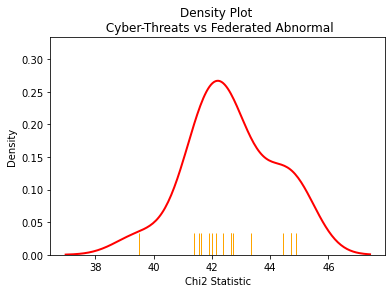

/home/ubuntu/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/home/ubuntu/.local/lib/python3.6/site-packages/seaborn/distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


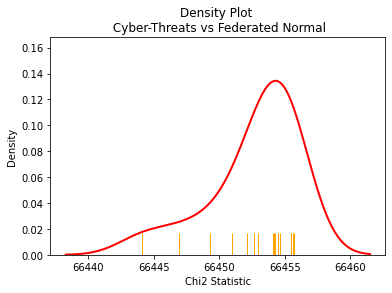

/home/ubuntu/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


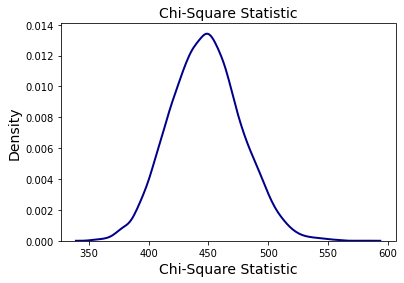

In [8]:
plt.title('Density Plot \n Cyber-Threats vs Federated Abnormal')
plt.xlabel('Chi2 Statistic')
plt.ylabel('Density')

array = np.sort(np.array(ct_vs_fed_abnormal))
sns.distplot(ct_vs_fed_abnormal, hist = False, kde = True, rug = True,
             color = 'red', 
             kde_kws={'linewidth': 2},
             rug_kws={'color': 'orange','height':0.1})
# plt.plot(array, stats.chi2.cdf(array, 448), linestyle='--')
# plt.xlim(35, 700)
plt.show()

plt.title('Density Plot \n Cyber-Threats vs Federated Normal')
plt.xlabel('Chi2 Statistic')
plt.ylabel('Density')

sns.distplot(ct_vs_fed_normal, hist = False, kde = True, rug = True,
             color = 'red', 
             kde_kws={'linewidth': 2},
             rug_kws={'color': 'orange','height':0.1})

plt.show()

# Plot formatting
plt.title('Chi-Square Statistic', fontsize=14)
plt.xlabel('Chi-Square Statistic', fontsize=14)
plt.ylabel('Density', fontsize=14)
sns.distplot(np.random.chisquare(df=448, size=10000), hist=False, color = 'darkblue', kde_kws={'linewidth': 2})
# plt.yscale('log',base=10)
plt.savefig("figures/chi2_plot.png")

plt.show()

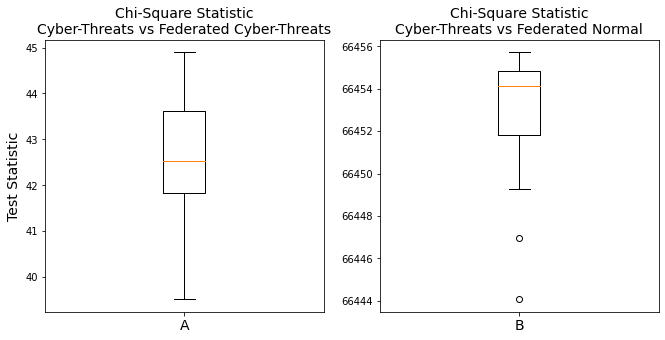

[66454.1452717844, 66452.13150795363, 66449.28852226304, 66452.65812949876, 66455.4496630311, 66454.62461822123, 66455.63389726492, 66454.10057629194, 66454.26851343802, 66455.6187949224, 66455.71086174344, 66452.91789153779, 66454.49032407686, 66444.06365704938, 66450.94604168352, 66446.9464225866]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


[42.659646109021494, 41.894154658367704, 42.37745048341919, 43.35162074667121, 44.71751697706707, 44.717028854039526, 44.421883191529446, 41.36951085667561, 39.50649788415837, 42.738539584684446, 44.89643303969548, 42.01110602071989, 42.65974699853251, 41.616514084937194, 42.13390856353101, 41.55348128190493]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


In [9]:
fig, axs = plt.subplots(1,2, figsize=(11, 5))

data =[ct_vs_fed_normal, ct_vs_fed_abnormal]

#axs[0].set_xlabel("Cyber-Threats vs Federated Normal", fontsize=14)
#axs[1].set_ylabel("Test Statistic", fontsize=14)
axs[1].set_title("Chi-Square Statistic\nCyber-Threats vs Federated Normal", fontsize=14)
axs[1].boxplot(ct_vs_fed_normal)
axs[1].set_xticklabels('B', fontsize=14)

#axs[1].set_xlabel("Cyber-Threats vs Federated Abnormal", fontsize=14)
axs[0].set_ylabel("Test Statistic", fontsize=14)
axs[0].set_title("Chi-Square Statistic\nCyber-Threats vs Federated Cyber-Threats", fontsize=14)
axs[0].boxplot(ct_vs_fed_abnormal)
axs[0].set_xticklabels('A', fontsize=14)
plt.savefig("figures/boxplot.png")
plt.show()

print(ct_vs_fed_normal)
print(ct_vs_fed_normal_pvalue)
print("\n")
print(ct_vs_fed_abnormal)
print(ct_vs_fed_abnormal_pvalue)


In [10]:
np.average(ct_vs_fed_normal)
#np.average(ct_vs_fed_abnormal)

66452.68716833419

[2.25663431 1.86777664 0.63439619 2.29445569 1.97365918 1.14739791
 5.59770795 3.00142026 2.86209845 2.05788729 5.76342617 2.70572008
 7.09597569 0.77144369 7.81100336 7.10158205 0.42928081 2.26522004
 0.96356172 5.89285111 2.0358935  0.1057837  5.48363298 2.7572412
 7.32191156 1.56314437 0.67859273 4.18226739 2.09698924 1.46014422
 1.37467433 0.40953701 1.90683929 1.34645457 3.75353546 1.92794203
 0.99185864 7.07036872 2.35616606 0.58584864 1.39117065 2.25017217
 1.89595321 1.20361269 1.95857879 0.06774856 1.95203955 1.888021
 0.52846804 2.07816577]


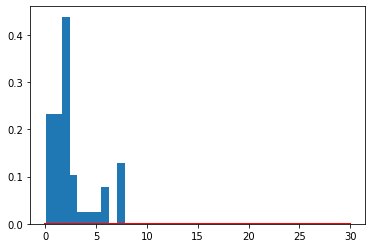

In [11]:
norm = stats.norm(0, 1)

x1 = norm.rvs(size=50)**2
x2 = norm.rvs(size=50)**2
x3 = norm.rvs(size=50)**2
print(x1+x2+x3)
f = x1 + x2 + x3

plt.hist(f, 10, density=True)

# Plot the theoretical density of f
x = np.arange(0, 30, .05)
plt.plot(x, chi2.pdf(x, df=448), color='r', lw=2)
plt.show()

## Attention K-S Test

In [12]:
with open('Attention-Based_Weights/all_Linux_Client1_Normal_attention.npy', 'rb') as f:
    attention_client1 = np.load(f)
with open('Attention-Based_Weights/all_Linux_Client2_Normal_attention.npy', 'rb') as f:
    attention_client2 = np.load(f)
with open('Attention-Based_Weights/all_Linux_Normal_attention.npy', 'rb') as f:
    attention_fed_normal = np.load(f)
with open('Attention-Based_Weights/all_Linux_Abnormal_attention.npy', 'rb') as f:
    attention_fed_abnormal = np.load(f)

In [13]:
att_client1_bar = attention_client1.sum(axis=0)
att_client2_bar = attention_client2.sum(axis=0)
att_fed_normal_bar = attention_fed_normal.sum(axis=0)
att_fed_abnormal_bar = attention_fed_abnormal.sum(axis=0)

In [14]:
sorted_att_client1_bar = np.sort(att_client1_bar, axis=0)
sorted_att_client2_bar = np.sort(att_client2_bar, axis=0)
sorted_att_fed_normal_bar = np.sort(att_fed_normal_bar, axis=0)
sorted_att_fed_abnormal_bar = np.sort(att_fed_abnormal_bar, axis=0)

In [15]:
scaled_att_client1_bar = (sorted_att_client1_bar - sorted_att_client1_bar.mean())/sorted_att_client1_bar.std()
scaled_att_client2_bar = (sorted_att_client2_bar - sorted_att_client2_bar.mean())/sorted_att_client2_bar.std()
scaled_att_fed_normal_bar = (sorted_att_fed_normal_bar - sorted_att_fed_normal_bar.mean())/sorted_att_fed_normal_bar.std()
scaled_att_fed_abnormal_bar = (sorted_att_fed_abnormal_bar - sorted_att_fed_abnormal_bar.mean())/sorted_att_fed_abnormal_bar.std()

In [16]:
print("KS Test for Client 1 and Client 2")
print(ks_2samp(scaled_att_client1_bar, scaled_att_client2_bar))
print("KS Test for Client 1 and Federated")
print(ks_2samp(scaled_att_client1_bar, scaled_att_fed_normal_bar))
print("KS Test for Client 2 and Federated")
print(ks_2samp(scaled_att_client2_bar, scaled_att_fed_normal_bar))
print("KS Test for Client 1 and Cyber-Threat")
print(ks_2samp(scaled_att_client1_bar, scaled_att_fed_abnormal_bar))
print("KS Test for Client 2 and Cyber-Threat")
print(ks_2samp(scaled_att_client2_bar, scaled_att_fed_abnormal_bar))
print("KS Test for Federated Normal and Federated Cyber-Threat")
print(ks_2samp(scaled_att_fed_normal_bar, scaled_att_fed_abnormal_bar))

KS Test for Client 1 and Client 2
KstestResult(statistic=0.8819599109131403, pvalue=5.8052329335077375e-183)
KS Test for Client 1 and Federated
KstestResult(statistic=0.8685968819599109, pvalue=6.399328678845312e-176)
KS Test for Client 2 and Federated
KstestResult(statistic=0.7461024498886414, pvalue=3.6621108291849417e-122)
KS Test for Client 1 and Cyber-Threat
KstestResult(statistic=0.844097995545657, pvalue=1.0058777356837117e-163)
KS Test for Client 2 and Cyber-Threat
KstestResult(statistic=0.8418708240534521, pvalue=1.1730517818959342e-162)
KS Test for Federated Normal and Federated Cyber-Threat
KstestResult(statistic=0.844097995545657, pvalue=1.0058777356837117e-163)


In [17]:
print("KS Test for Client 1 and Client 2")
print(ks_2samp(att_client1_bar, att_client2_bar))
print("KS Test for Client 1 and Federated")
print(ks_2samp(att_client1_bar, att_fed_normal_bar))
print("KS Test for Client 2 and Federated")
print(ks_2samp(att_client2_bar, att_fed_normal_bar))
print("KS Test for Federated and Cyber-Threat")
print(ks_2samp(att_client1_bar, att_fed_abnormal_bar))
print("KS Test for Federated and Cyber-Threat")
print(ks_2samp(att_client2_bar, att_fed_abnormal_bar))
print("KS Test for Federated Normal and Federated Cyber-Threat")
print(ks_2samp(att_fed_normal_bar, att_fed_abnormal_bar))

KS Test for Client 1 and Client 2
KstestResult(statistic=0.12694877505567928, pvalue=0.0014238683352666636)
KS Test for Client 1 and Federated
KstestResult(statistic=0.27839643652561247, pvalue=1.0086465767199179e-15)
KS Test for Client 2 and Federated
KstestResult(statistic=0.17817371937639198, pvalue=1.2146876998660414e-06)
KS Test for Federated and Cyber-Threat
KstestResult(statistic=0.4521158129175947, pvalue=1.0195042087463468e-41)
KS Test for Federated and Cyber-Threat
KstestResult(statistic=0.576837416481069, pvalue=2.085864599933297e-69)
KS Test for Federated Normal and Federated Cyber-Threat
KstestResult(statistic=0.7305122494432071, pvalue=2.0395834355106364e-116)
